# Tutorial 9
# CSC420 - Fall 2021
# Babak Taati

affine transformations, SIFT (and SURF and ORB), and RANSAC

In [4]:
# the usual
import numpy as np
import matplotlib.pyplot as plt

!pip install opencv-python
import cv2

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Part 1: affine transformations

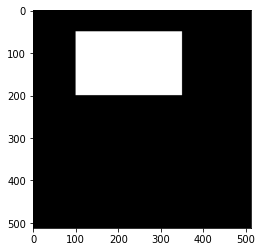

In [2]:
# draw a rectangle
img = np.zeros(shape=[512, 512], dtype=np.uint8)
img[50:200,100:350]=255
plt.imshow(img, cmap='gray')

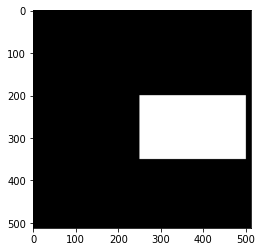

In [3]:
# translation
rows, cols = img.shape 
M = np.array([[1.0, 0, 150], [0, 1, 150]])
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]]


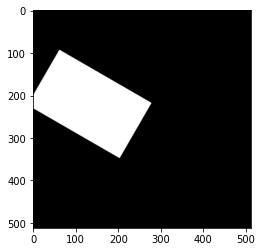

In [4]:
# rotation
theta = np.pi / 6
M = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0]])
print(M)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

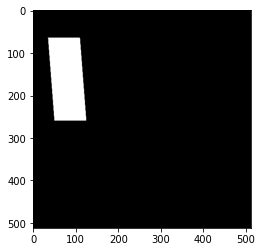

In [5]:
# shear
M = np.array([[.3, 0.1, 0], [0, 1.3, 0]])
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

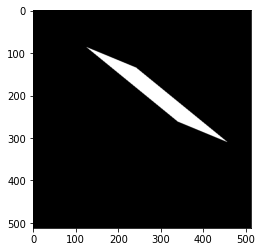

In [6]:
# random affine transform
M = np.random.rand(2,3)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

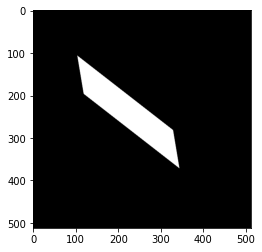

In [7]:
# calculate an affine transform based on point matches
pts1 = np.float32([[10, 10], 
                   [20, 30],  
                   [30, 40]]) 
  
pts2 = np.float32([[19, 20], 
                   [30, 39],  
                   [40, 52]]) 
  
M = cv2.getAffineTransform(pts1, pts2) # least squares (if more than 3 point matches given)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

Part 2: SIFT (and SURF and ORB)

In [2]:
!pip install  opencv-contrib-python==3.4.2.17 # otherwise you'd get an error message saying this when you try to use SIFT
                                   # This algorithm is patented and is excluded in this configuration; 
                                   # Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in 
                                   # function 'cv::xfeatures2d::SIFT::create'

                                   


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 60.5 MB 1.0 MB/s            
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [9]:
# mount your google drive
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

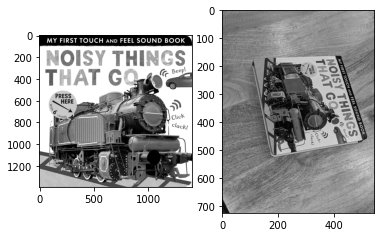

In [5]:
# load two images
img1 = cv2.imread("./images/Book_cover.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("./images/Book_pic.png", cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')

In [9]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create() # read about SURF here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html
orb = cv2.ORB_create(nfeatures=1000) # read about ORB here: https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html 

error: OpenCV(3.4.11) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-wliqcxi0/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [8]:
kp1_SIFT, desc1_SIFT = sift.detectAndCompute(img1, None)
kp2_SIFT, desc2_SIFT = sift.detectAndCompute(img2, None)

kp1_SURF, desc1_SURF = surf.detectAndCompute(img1, None)
kp2_SURF, desc2_SURF = surf.detectAndCompute(img2, None)

kp1_ORB, desc1_ORB = orb.detectAndCompute(img1, None)
kp2_ORB, desc2_ORB = orb.detectAndCompute(img2, None)

NameError: name 'surf' is not defined

In [ ]:
img1_SIFT = cv2.drawKeypoints(img1, kp1_SIFT, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(255,255,0))
img2_SIFT = cv2.drawKeypoints(img2, kp1_SIFT, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(255,255,0))

plt.subplot(1, 2, 1)
plt.imshow(img1_SIFT)
plt.subplot(1, 2, 2)
plt.imshow(img2_SIFT)

In [ ]:
img1_SURF = cv2.drawKeypoints(img1, kp1_SURF, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(200,0,0))
img2_SURF = cv2.drawKeypoints(img2, kp1_SURF, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(200,0,0))

plt.subplot(1, 2, 1)
plt.imshow(img1_SURF)
plt.subplot(1, 2, 2)
plt.imshow(img2_SURF)

In [ ]:
img1_ORB = cv2.drawKeypoints(img1, kp1_ORB, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0,255,0))
img2_ORB = cv2.drawKeypoints(img2, kp1_ORB, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0,255,0))

plt.subplot(1, 2, 1)
plt.imshow(img1_ORB)
plt.subplot(1, 2, 2)
plt.imshow(img2_ORB)

In [ ]:
# which keypoints/descriptor to use?

kp1 = kp1_SIFT
kp2 = kp2_SIFT
desc1 = desc1_SIFT
desc2 = desc2_SIFT

# kp1 = kp1_SURF
# kp2 = kp2_SURF
# desc1 = desc1_SURF
# desc2 = desc2_SURF

# kp1 = kp1_ORB
# kp2 = kp2_ORB
# desc1 = desc1_ORB
# desc2 = desc2_ORB

In [ ]:
# (brute force) matching of descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2) # k=2 means find the top two matchs for each query descriptor

# Apply ratio test (as per David Lowe's SIFT paper: compare the best match with the 2nd best match_
good_matches = []
good_matches_without_list = []
for m,n in matches:
    if m.distance < 0.75*n.distance: # only accept matchs that are considerably better than the 2nd best match
        good_matches.append([m])
        good_matches_without_list.append(m) # this is to simplify finding a homography later

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good_matches,
                          None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, 
                          matchColor=(0,255,0))
plt.imshow(img3),plt.show()

# you can also an approximate (but fast) nearest neighbour algorithm called FLANN. See here:
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
# FLANN = Fast Library for Approximate Nearest Neighbour

# paper: https://ieeexplore.ieee.org/iel7/34/4359286/06809191.pdf 

# how do you think FLANN might work?
## remember k-d trees from your data structure class? (and more ...)

Part 3: RANSAC

In [11]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches_without_list ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches_without_list ]).reshape(-1,1,2)

NameError: name 'good_matches_without_list' is not defined

In [10]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
detected_book = cv2.perspectiveTransform(pts,M)

img3 = cv2.polylines(img2.copy(),[np.int32(detected_book)],True,255,3, cv2.LINE_AA)
plt.imshow(img3, 'gray')

NameError: name 'src_pts' is not defined

In [ ]:
img4 = cv2.drawMatchesKnn(img1,kp1,img3,kp2,good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor=(0,255,0))
plt.imshow(img4),plt.show()

In [ ]:
# warp the book cover to align with the other picture

h,w = img2.shape
warped = cv2.warpPerspective(img1, M, (w, h))
plt.imshow(warped, cmap='gray')

img2_book_only = cv2.bitwise_and(img2, warped)

plt.subplot(1, 3, 1)
plt.imshow(warped, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img2_book_only, cmap='gray')

In [ ]:
# what do you expect to see if we do this:

overlaid = np.zeros((h,w,3))
overlaid[:,:,0] = img2  # or img2_book_only
overlaid[:,:,1] = img2  # or img2_book_only
overlaid[:,:,2] = warped

plt.figure(figsize=(25,25))
plt.imshow(np.uint8(overlaid))
plt.xticks([]), plt.yticks([])


In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img1,cmap = 'gray')
ax1.title.set_text('RGB'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(img2,cmap = 'gray')
ax2.title.set_text('Gray'), ax2.set_xticks([]), ax2.set_yticks([])

In [ ]:
res = cv2.bitwise_and(img2, warped)
plt.imshow(res)